In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터

#### (1) 데이터 가져오기

In [218]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [219]:
train.head() #데이터 형태 파악

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [220]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [221]:
train.info() # 데이터 정보 확인
# 11가지의 feature
# 마지막 count는 target값으로 예측해야할 값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [222]:
test.info()
#9가지의 feature
# train에 있는 feature 중 casual,registered feature 존재하지 않음->제거 대상

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


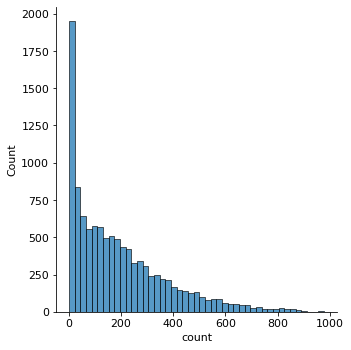

In [223]:
sns.displot(train['count'],ax=axes[0])

- 회귀 모델은 좋은 성능을 내기 위해 데이터가 정규분포를 따르는 것이 좋다.
- 로그 정규화 : 정규 분포가 아닌 데이터를 정규 분포로 변환하는 기술

-> 값을 분산시키고 극단값의 영향을 줄이는데 도움

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


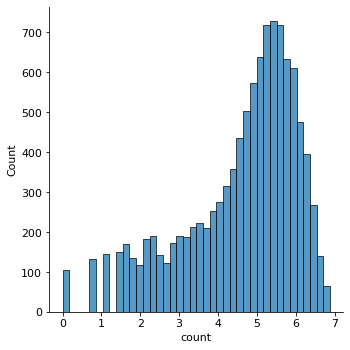

In [224]:
sns.displot(np.log(train['count']),ax = axes[1])

### EDA

#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 컬럼 생성하기

In [225]:
train['datetime'] = pd.to_datetime(train['datetime']) #object자료형 -> datetime자료형
test['datetime'] = pd.to_datetime(test['datetime'])

In [226]:
train['year'] = train['datetime'].dt.year #년
train['month'] = train['datetime'].dt.month #월
train['day'] = train['datetime'].dt.day #일
train['hour'] = train['datetime'].dt.hour #시
train['minute'] = train['datetime'].dt.minute #분
train['second'] = train['datetime'].dt.second #초
train['weekday'] = train['datetime'].dt.weekday#요일

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['weekday'] = train['datetime'].dt.weekday

#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

#### train

<AxesSubplot:xlabel='second', ylabel='count'>

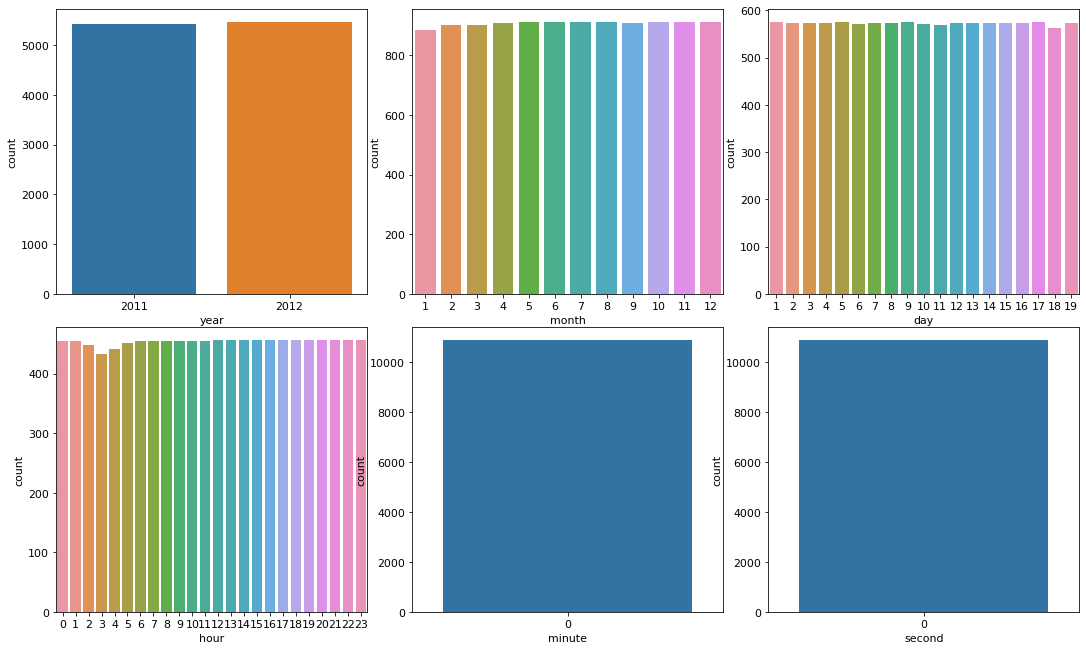

In [227]:
figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,9)) # (2,3)행렬로 그래프 출력
plt.tight_layout() #그래프 사이의 여백

sns.countplot(x='year',data=train,ax=axes[0,0])
sns.countplot(x='month',data=train,ax=axes[0,1])
sns.countplot(x='day',data=train,ax=axes[0,2])
sns.countplot(x='hour',data=train,ax=axes[1,0])
sns.countplot(x='minute',data=train,ax=axes[1,1])
sns.countplot(x='second',data=train,ax=axes[1,2])
# minute과 second의 값은 0만 존재하므로 예측의 도움이 되지 않는다고 판단->제거대상

#### test

<AxesSubplot:xlabel='second', ylabel='count'>

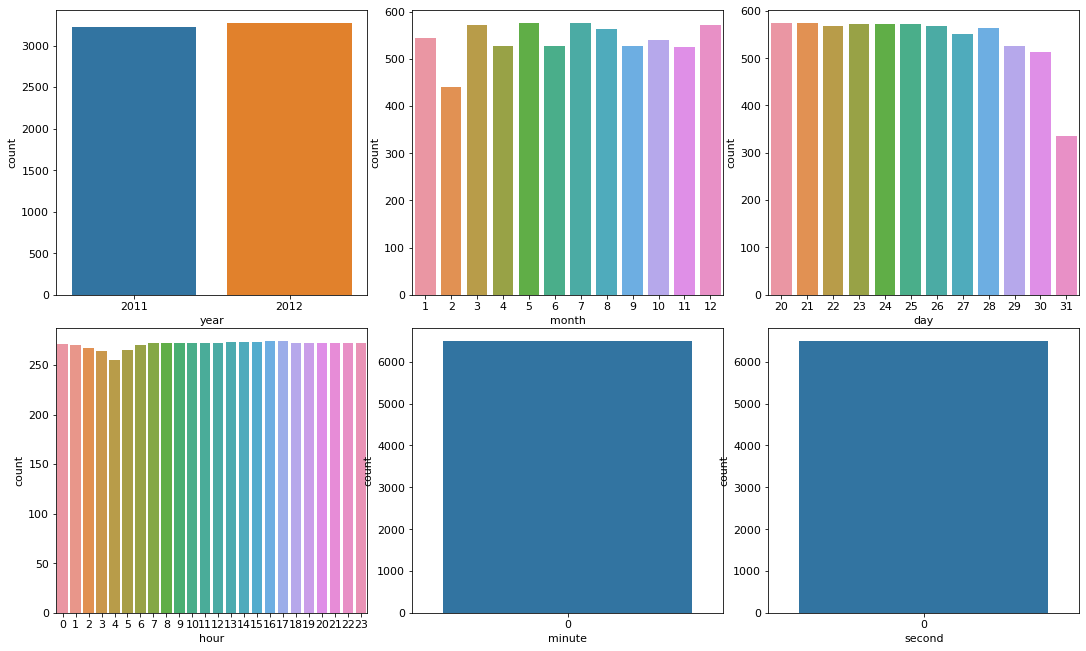

In [228]:
figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,9)) # (2,3)행렬로 그래프 출력
plt.tight_layout() #그래프 사이의 여백

sns.countplot(x='year',data=test,ax=axes[0,0])
sns.countplot(x='month',data=test,ax=axes[0,1])
sns.countplot(x='day',data=test,ax=axes[0,2])
sns.countplot(x='hour',data=test,ax=axes[1,0])
sns.countplot(x='minute',data=test,ax=axes[1,1])
sns.countplot(x='second',data=test,ax=axes[1,2])

++ 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량

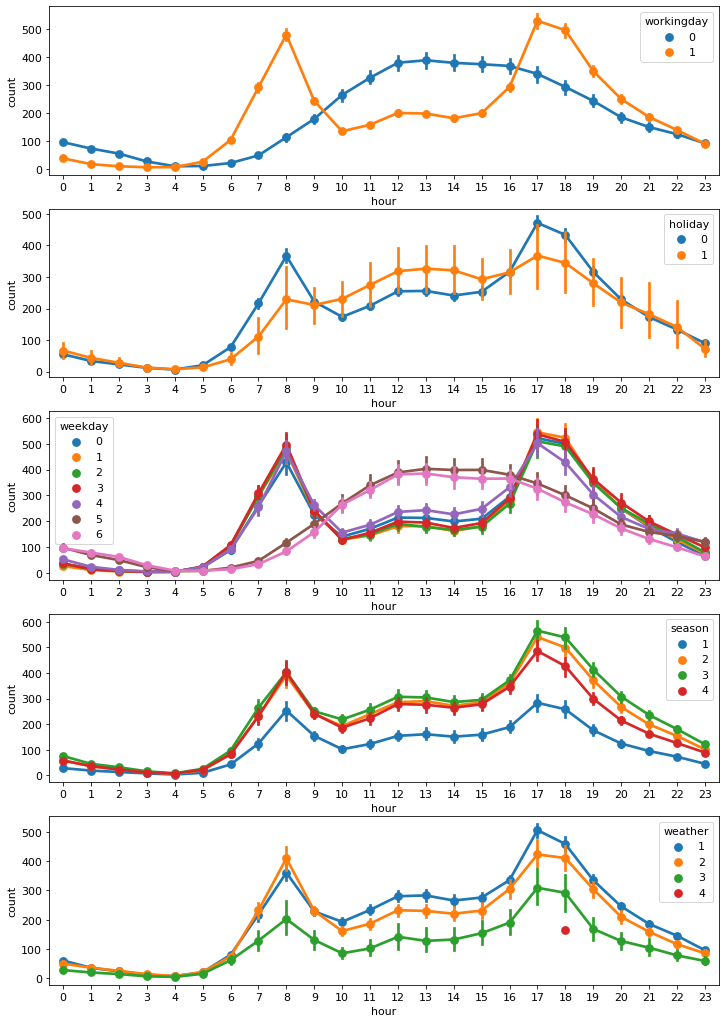

In [229]:
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

-> weather = 4인 경우 이상치로 판단 ( 4 : 폭우, 폭설 )

In [230]:
train = train[train['weather'] != 4]

<AxesSubplot:xlabel='windspeed', ylabel='count'>

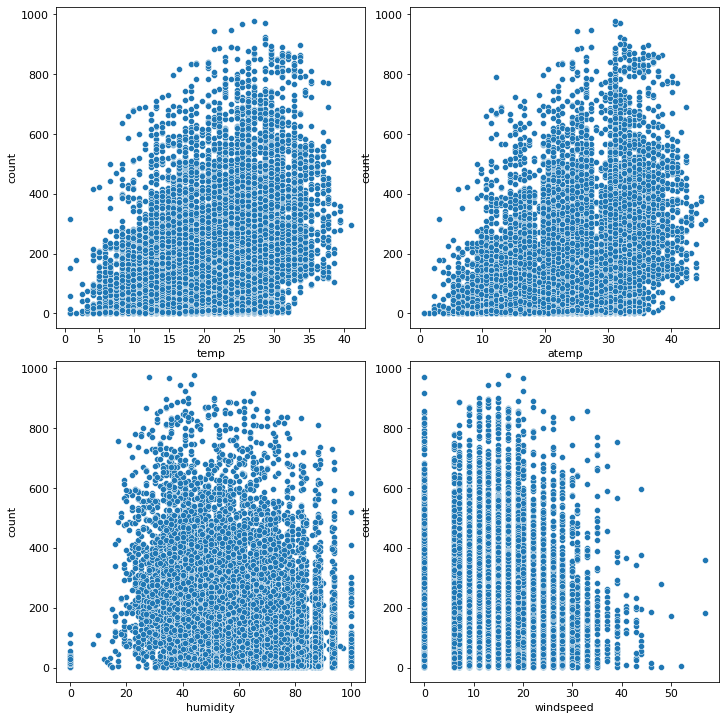

In [231]:
figure, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
plt.tight_layout()

sns.scatterplot(x='temp',y='count',data=train,ax=axes[0,0])
sns.scatterplot(x='atemp',y='count',data=train,ax=axes[0,1])
sns.scatterplot(x='humidity',y='count',data=train,ax=axes[1,0])
sns.scatterplot(x='windspeed',y='count',data=train,ax=axes[1,1])

- windspeed는 바람의 세기로 유독 0으로 관찰되는 경우가 많음
- 0의 값을 결측치로 판단
- 0의 값을 다른 값으로 변환해줘야함

++ 수치형 feature 상관계수 파악

<AxesSubplot:>

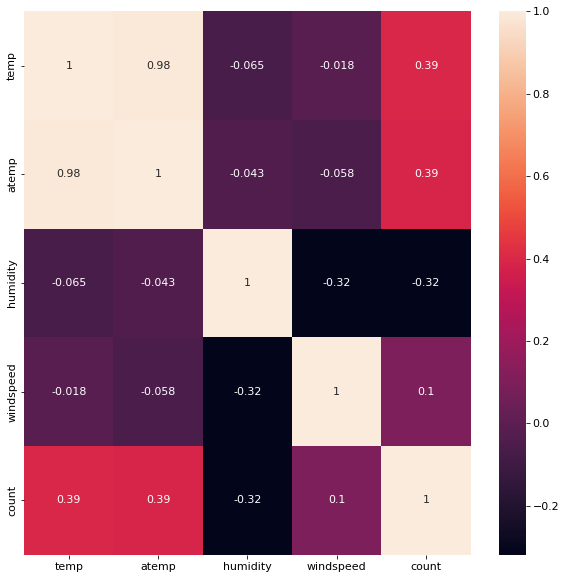

In [232]:
corrmap=train[['temp','atemp','humidity','windspeed','count']].corr()

fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrmap, annot=True)
# target값인 count와의 상관계수를 중점으로 보았을때 temp, atemp 중 하나 제거

### feature engineering

In [233]:
'''from sklearn.ensemble import RandomForestClassifier

def pred_windspeed(df):
    wind_0 = df.loc[df['windspeed'] == 0] #test data
    wind_not0 = df.loc[df['windspeed'] != 0] #train data
    
    features = ['season','weather','humidity','month','temp','year']
    
    wind_not0.loc[:,'windspeed'] = wind_not0['windspeed'].astype('str')
    #실제 관측된 바람의 세기로 예측하기 위해 잠시 str타입으로 변경
    
    model = RandomForestClassifier()
    model.fit(wind_not0[features],wind_not0['windspeed'])
    
    pred_wind_0 = model.predict(wind_0[features])
    wind_0.loc[:,'windspeed'] = pred_wind_0
    
    data = pd.concat([wind_0,wind_not0],ignore_index=True)
    data['windspeed'] = data['windspeed'].astype('float') #str -> float
    
    data.reset_index(inplace=True,drop=True)
    
    return data

train = pred_windspeed(train)'''

"from sklearn.ensemble import RandomForestClassifier\n\ndef pred_windspeed(df):\n    wind_0 = df.loc[df['windspeed'] == 0] #test data\n    wind_not0 = df.loc[df['windspeed'] != 0] #train data\n    \n    features = ['season','weather','humidity','month','temp','year']\n    \n    wind_not0.loc[:,'windspeed'] = wind_not0['windspeed'].astype('str')\n    #실제 관측된 바람의 세기로 예측하기 위해 잠시 str타입으로 변경\n    \n    model = RandomForestClassifier()\n    model.fit(wind_not0[features],wind_not0['windspeed'])\n    \n    pred_wind_0 = model.predict(wind_0[features])\n    wind_0.loc[:,'windspeed'] = pred_wind_0\n    \n    data = pd.concat([wind_0,wind_not0],ignore_index=True)\n    data['windspeed'] = data['windspeed'].astype('float') #str -> float\n    \n    data.reset_index(inplace=True,drop=True)\n    \n    return data\n\ntrain = pred_windspeed(train)"

In [234]:
train[train['windspeed']==0] #결측치 대체 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0,0
10829,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0,0
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,0,1
10860,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,0,1


#### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [235]:
drop_feature1=['datetime','atemp','day','minute','second','casual','registered']
train = train.drop(drop_feature1, axis =1)

drop_feature2=['datetime','atemp','day','minute','second']
test = test.drop(drop_feature2, axis = 1)

- datetime : 6가지의 새로운 컬럼을 추가하였기에 제거
- atemp : 상관계수를 파악했을 때 temp 컬럼과 동일하고 두 컬럼이 동시에 존재할땐 다중공산성의 문제가 고려되어 둘 중 하나를 제거
- day : train에는 1일부터 19일까지의 데이터 test에는 그 이후의 데이터로 의미없는 feature로 판단되어 제거
- minute, second : 0의 값만 존재하여 제거
- casual, registered : test데이터에는 존재하지 않은 feature로 제거

In [236]:
y = train['count']
X_train = train.drop(['count'],axis = 1)

# 검증셋 훈련셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train,y,test_size=0.2,random_state=123)

### Model

In [237]:
#평가지표RMSLE
def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

#### (5) LinearRegression 모델 학습

베이스라인 모델로 회귀 문제에서 가장 기본적으로 많이 쓰이는 선형회귀 모델을 사용했다.

In [238]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,np.log(y_train))

# vaildation set으로 검증
pred = model.predict(x_val)
print(pred)

#로그 변환을 원래 target값으로 변환
y_val_exp = np.exp(pred)
y_val_exp

[5.09672517 4.24659578 3.74505347 ... 5.58135332 4.78567168 3.8322555 ]


array([163.48564273,  69.86716367,  42.31126965, ..., 265.43057623,
       119.7817916 ,  46.16654969])

In [239]:
RMSLE = rmsle(np.log(y_val),pred,True)
print(f'vaildation data set의 RMSLE :{rmsle(np.log(y_val),pred,True):.4f}')
print(f'MSE : {np.exp(RMSLE):.4f}')
#windspeed결측치대체 rmsle:1.0114, MSE : 2.7494

vaildation data set의 RMSLE :0.9983
MSE : 2.7138


#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수 값 계산

In [240]:
test

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour,weekday
0,1,0,1,1,10.66,56,26.0027,2011,1,0,5
1,1,0,1,1,10.66,56,0.0000,2011,1,1,5
2,1,0,1,1,10.66,56,0.0000,2011,1,2,5
3,1,0,1,1,10.66,56,11.0014,2011,1,3,5
4,1,0,1,1,10.66,56,11.0014,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,19,2
6489,1,0,1,2,10.66,60,11.0014,2012,12,20,2
6490,1,0,1,1,10.66,60,11.0014,2012,12,21,2
6491,1,0,1,1,10.66,56,8.9981,2012,12,22,2


In [241]:
prediction_test = model.predict(test)
print(prediction_test)

prediction_test_exp=np.exp(prediction_test)
print(prediction_test_exp)

[2.49680951 2.52496035 2.62837633 ... 5.80696021 5.96377822 5.93399285]
[ 12.1436878   12.4904      13.85126178 ... 332.60653501 389.07737111
 377.65944498]


#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화

In [242]:
result_data = pd.DataFrame(prediction_test_exp, columns=['count'])

In [243]:
test_data = pd.concat([test,result_data],axis=1)
test_data

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour,weekday,count
0,1,0,1,1,10.66,56,26.0027,2011,1,0,5,12.143688
1,1,0,1,1,10.66,56,0.0000,2011,1,1,5,12.490400
2,1,0,1,1,10.66,56,0.0000,2011,1,2,5,13.851262
3,1,0,1,1,10.66,56,11.0014,2011,1,3,5,15.857396
4,1,0,1,1,10.66,56,11.0014,2011,1,4,5,17.585101
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,19,2,272.537997
6489,1,0,1,2,10.66,60,11.0014,2012,12,20,2,302.231726
6490,1,0,1,1,10.66,60,11.0014,2012,12,21,2,332.606535
6491,1,0,1,1,10.66,56,8.9981,2012,12,22,2,389.077371


<AxesSubplot:xlabel='temp', ylabel='count'>

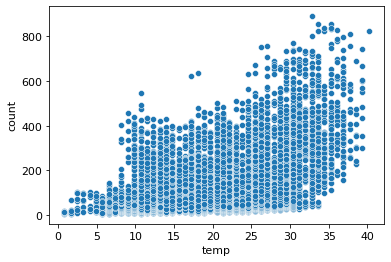

In [244]:
sns.scatterplot(data=test_data, x='temp', y='count')

<AxesSubplot:xlabel='humidity', ylabel='count'>

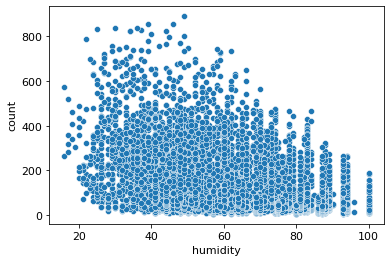

In [245]:
sns.scatterplot(data=test_data, x='humidity', y='count')

앙상블 모델 - Random Forest

여러 개의 결정 트리를 훈련하여 예측을 종합하여 최종예측을 만드는 앙상블 기법의 모델로 여러개의 feature을 가지고 있을 때 다양한 feature의 부분집합을 사용하여 복잡한 패턴을 잘 학습시키고 잡음이 많은 데이터에도 견고한 성능을 보인다는 점에서 해당 모델 사용

In [247]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

RFR.fit(x_train,np.log(y_train))

pred = RFR.predict(x_val)

print(f'RMSLE 값 : {rmsle(np.log(y_val),pred,True):.4f}' )

RMSLE 값 : 0.2853


앙상블 모델 - Gradient Boost

이전 학습자가 만든 오류를 수정하는 방식으로 작동한다는 점에서 더 정확한 예측 성능을 제공할 수 있다.

In [246]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(x_train, np.log(y_train))

pred = GBR.predict(x_val)

print(f'RMSLE 값 : {rmsle(np.log(y_val),pred,True):.4f}' )

RMSLE 값 : 0.3809


해당 데이터의 예측에서는 랜덤포레스트가 가장 좋은 성능을 보였다.
이유는 해당 모델에 대해서 좀 더 공부한 후 
